In [5]:
from __future__ import print_function, unicode_literals, division
import numpy as np
import pandas as pd

np.random.seed(42)

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12

In [3]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [4]:
X

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496],
       [ 1.11816122,  0.32508721,  0.31710572],
       [-1.02258878, -0.64384064, -0.13368695],
       [ 0.67351984, -0.27342519, -0.00787835],
       [ 1.01619558,  0.51546608,  0.46783297],
       [ 0.54957723,  0.67728016,  0.2340159 ],
       [-0.98960443,  0.00886617, -0.12152034],
       [ 1.13248106,  0.28229967,  0.06972972],
       [-0.99337712, -0.26832824, -0.15761101],
       [-0.94763679, -0.4995849 , -0.13927911],
       [ 1.10095709,  0.1706481 ,  0.09790432],
       [-0.34604591,  0.45334414,  0.06433843],
       [ 0.69102621, -0.27337761, -0.05926516],
       [ 0.68302902,  0.70421846,  0.24642318],
       [ 0.8774031 , -0.16775101, -0.02162333],
       [-1.06090127, -0.48213721, -0.38573526],
       [ 0.52336644,  0.66585845,  0.390

In [6]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
display(len(X_train))
display(len(X_test))
display(X_train.shape)

52500

17500

(52500, 784)

In [11]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1


In [17]:
d

153

In [18]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [19]:
from sklearn.datasets import load_iris

In [20]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


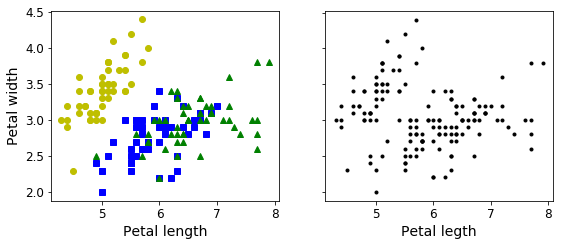

In [22]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0,0], X[y==0, 1], "yo", label="Iris-Setosa")
plt.plot(X[y==1,0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==2,0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c="k", marker=".")
plt.xlabel("Petal legth", fontsize=14)
plt.tick_params(labelleft="off")
plt.show()

In [23]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

In [24]:
X_train = mnist["data"][:60000]
y_train = mnist["target"][:60000]

X_test = mnist["data"][60000:]
y_test = mnist["target"][60000:]

In [25]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state=42)

In [26]:
import time
t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [27]:
print("Training took {:.2f}s".format(t1-t0))

Training took 5.21s


In [28]:
from sklearn.metrics import accuracy_score

In [31]:
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9455

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [34]:
rnd_clf2 = RandomForestClassifier(random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [35]:
print("Training took {:.2f}s".format(t1-t0))

Training took 12.64s


In [36]:
X_test_reduced = pca.transform(X_test)
y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.8908

In [37]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])